In [1]:
# # Restart runtime to clear cached libraries
# import os
# os.kill(os.getpid(), 9)

In [2]:
!pip install trl -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.3/366.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:

# !pip install --upgrade datasets fsspec -q
! pip install -U datasets huggingface_hub fsspec -q


In [4]:
from huggingface_hub import notebook_login
notebook_login()

In [6]:
from transformers import AutoProcessor, Gemma3ForConditionalGeneration,AutoTokenizer

In [8]:
from PIL import Image
import requests
import torch

model_id = "google/gemma-3-4b-it"

model = Gemma3ForConditionalGeneration.from_pretrained(
    model_id, device_map="auto", attn_implementation='eager'
).eval()


config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

In [9]:
tokenizer = AutoTokenizer.from_pretrained(model_id)

tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

# Test the Model with Zero-Shot Inference

In [10]:
from datasets import load_dataset
dataset = load_dataset("TheFinAI/Fino1_Reasoning_Path_FinQA",
                       split="train[:500]",
                       trust_remote_code=True)
                      #  use_auth_token=True)


README.md:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5499 [00:00<?, ? examples/s]

In [11]:

Question= dataset[0] ["Open-ended Verifiable Question"]

In [12]:
prompt_style = """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Question:
{}

### Response:
<think>
{}
"""

In [13]:
 tokenizer.eos_token

'<eos>'

In [14]:
prompt_style.format(Question, "")

'Below is an instruction that describes a task, paired with an input that provides further context.\nWrite a response that appropriately completes the request.\nBefore answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.\n\n### Question:\nPlease answer the given financial question based on the context.\nContext: amortization expense , which is included in selling , general and administrative expenses , was $ 13.0 million , $ 13.9 million and $ 8.5 million for the years ended december 31 , 2016 , 2015 and 2014 , respectively . the following is the estimated amortization expense for the company 2019s intangible assets as of december 31 , 2016 : ( in thousands ) .\n|2017|$ 10509|\n|2018|9346|\n|2019|9240|\n|2020|7201|\n|2021|5318|\n|2022 and thereafter|16756|\n|amortization expense of intangible assets|$ 58370|\nat december 31 , 2016 , 2015 and 2014 , the company determined that its goodwill and indefinite- li

In [15]:
inputs = tokenizer(
    [prompt_style.format(Question, "") + tokenizer.eos_token],
    return_tensors="pt"
).to("cuda")

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
tokenizer.eos_token_id

In [ ]:
outputs = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=1200,
    eos_token_id=tokenizer.eos_token_id,
    use_cache=True,
)

In [ ]:
# response = tokenizer.batch_decode(outputs, skip_special_tokens=True)

In [ ]:
# response

In [ ]:
print(response[0].split("### Response:")[1])


# Here is the ground truth answer:

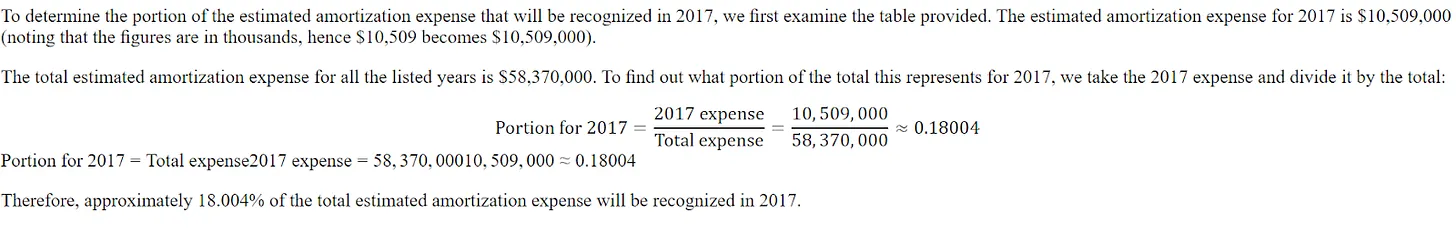

# **Processing the Dataset for Fine-Tuning**

In [16]:
train_prompt_style="""
Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Question:
{}

### Response:
<think>
{}
</think>
{}
"""

In [17]:
def formatting_prompts_func(examples):
    inputs = examples["Open-ended Verifiable Question"]
    complex_cots = examples["Complex_CoT"]
    outputs = examples["Response"]
    texts = []
    for question, cot, response in zip(inputs, complex_cots, outputs):
        # Append the EOS token to the response if it's not already there
        if not response.endswith(tokenizer.eos_token):
            response += tokenizer.eos_token
        text = train_prompt_style.format(question, cot, response)
        texts.append(text)
    return {"text": texts}

# Applied for all data

In [18]:
dataset = dataset.map(formatting_prompts_func, batched = True,)
dataset["text"][0]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

"\nBelow is an instruction that describes a task, paired with an input that provides further context.\nWrite a response that appropriately completes the request.\nBefore answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.\n\n### Question:\nPlease answer the given financial question based on the context.\nContext: amortization expense , which is included in selling , general and administrative expenses , was $ 13.0 million , $ 13.9 million and $ 8.5 million for the years ended december 31 , 2016 , 2015 and 2014 , respectively . the following is the estimated amortization expense for the company 2019s intangible assets as of december 31 , 2016 : ( in thousands ) .\n|2017|$ 10509|\n|2018|9346|\n|2019|9240|\n|2020|7201|\n|2021|5318|\n|2022 and thereafter|16756|\n|amortization expense of intangible assets|$ 58370|\nat december 31 , 2016 , 2015 and 2014 , the company determined that its goodwill and indefinite- 

In [19]:
from transformers import DataCollatorForLanguageModeling

In [20]:
data_collator = DataCollatorForLanguageModeling(
    tokenizer= tokenizer,
    mlm= False  # we're doing causal LM, not masked LM
)

In [21]:
from peft import get_peft_model,LoraConfig

In [22]:
peft_config = LoraConfig(
    r=6,
    lora_alpha=8,
    lora_dropout=0.05,
    bias="none",
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"],
    task_type="CAUSAL_LM",
)

In [23]:
from trl import SFTConfig, SFTTrainer
import torch

In [24]:
# Apply LoRA to model
model = get_peft_model(model, peft_config)
# model = model.to_empty(device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))
model = model.to("cuda")

In [25]:
# Configure trainer
args = SFTConfig(
    output_dir="./sft_output",
    max_steps=1000,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    learning_rate=5e-5,
    logging_steps=10,
    save_steps=100,
    # eval_strategy="steps",
    # eval_steps=50,
)


## or you can use Training argument

In [ ]:
# from transformers import TrainingArguments

# args = TrainingArguments(
#     output_dir="./results",
#     per_device_train_batch_size=1,
#     per_device_eval_batch_size=1,
#     num_train_epochs=3,
#     logging_dir="./logs",
#     logging_steps=10,
#     # evaluation_strategy="steps",
#     save_strategy="steps",
#     save_steps=500,
#     eval_steps=500,
#     save_total_limit=2,
#     fp16=True,
#     # load_best_model_at_end=True,
#     # metric_for_best_model="accuracy",
#     greater_is_better=True,
#     report_to="none"
# )


In [26]:
trainer = SFTTrainer(
    model=model,
    args=args,
    train_dataset=dataset,
    data_collator=data_collator,
    peft_config=peft_config,
)

Converting train dataset to ChatML:   0%|          | 0/500 [00:00<?, ? examples/s]

Adding EOS to train dataset:   0%|          | 0/500 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/500 [00:00<?, ? examples/s]

Truncating train dataset:   0%|          | 0/500 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [ ]:
torch.cuda.empty_cache()
trainer_state= trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: a48104046 (a48104046-dfas) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


# After fine tuning

In [ ]:
prompt_style = """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Question:
{}

### Response:
<think>
{}
"""

In [ ]:
inputs = tokenizer(
    [prompt_style.format(Question, "") + tokenizer.eos_token],
    return_tensors="pt"
).to("cuda")

In [ ]:
outputs = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=1200,
    eos_token_id=tokenizer.eos_token_id,
    use_cache=True,
)